In [27]:
using Plots
using DataFrames
using CSV
using LaTeXStrings
include("./TwoSpin_env.jl")

reward (generic function with 1 method)

In [7]:
read_data = CSV.read("./../../../Data/TwoSpin_Konly_d2_optADAM_W10.0_xi0.2_Jx0.7_Jz1.0_hz0.5_batch4_g0.95_1210/K_TL4000.csv", DataFrame)
Kt_data = Matrix(read_data)
println("read!")

read!


In [28]:
e = TS_env(init_env(100, 10.0, 0.2, 1.0, 0.7, 0.5)...)

TS_env(100, 4, 5, 10.0, 0.2, 1.0, 0.7, 0.5, ComplexF64[-2.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im -0.7 + 0.0im; 0.0 - 0.0im 1.0 + 0.0im -0.7 + 0.0im 0.0 + 0.0im; 0.0 - 0.0im -0.7 - 0.0im 1.0 + 0.0im 0.0 + 0.0im; -0.7 - 0.0im 0.0 - 0.0im 0.0 - 0.0im 0.0 + 0.0im], ComplexF64[0.0 + 0.0im -0.2 + 0.0im -0.2 + 0.0im 0.0 + 0.0im; -0.2 - 0.0im 0.0 + 0.0im 0.0 + 0.0im -0.2 + 0.0im; -0.2 - 0.0im 0.0 - 0.0im 0.0 + 0.0im -0.2 + 0.0im; 0.0 - 0.0im -0.2 - 0.0im -0.2 - 0.0im 0.0 + 0.0im], Hermitian{ComplexF64, Matrix{ComplexF64}}[[1.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.0 - 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.0 - 0.0im 0.0 - 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.0 - 0.0im 0.0 - 0.0im 0.0 - 0.0im 0.0 + 0.0im], [0.0 + 0.0im 0.5 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.5 - 0.0im 0.0 + 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.0 - 0.0im 0.0 - 0.0im 0.0 + 0.0im 0.0 + 0.0im; 0.0 - 0.0im 0.0 - 0.0im 0.0 - 0.0im 0.0 + 0.0im], [0.0 + 0.0im -0.0 - 0.5im 0.0 + 0.0im 0.0 + 0.0im; -0.0 + 0.5im 0.0 + 0.0im 0.0 + 0.0im 0

In [71]:
function FM_Kt2(en::TS_env)
    Kt0 = zeros(Float64, en.t_size, en.HS_size^2)
    for t in 1:en.t_size
        ktt = en.V_t * (cos(2pi*t/en.t_size)-1.0) / en.Ω + 1.0im * (en.V_t*en.H_0 - en.H_0*en.V_t)  * sin(2pi*t/en.t_size) / en.Ω^2 
        ktt = Hermitian(ktt)
        Kt0[t,:] = MtoV(ktt, en)
    end
    return Kt0
end

function FM_Kt3(en::TS_env)
    Kt0 = zeros(Float64, en.t_size, en.HS_size^2)
    for t in 1:en.t_size
        c1 = en.V_t*en.H_0 - en.H_0*en.V_t
        ktt = en.V_t * (cos(2pi*t/en.t_size)-1.0) / en.Ω + 1.0im * c1  * sin(2pi*t/en.t_size) / en.Ω^2 + (-en.H_0*c1+c1*en.H_0)* (cos(2pi*t/en.t_size)-1.0) / (en.Ω^3)
        ktt = Hermitian(ktt)
        Kt0[t,:] = MtoV(ktt, en)
    end
    return Kt0
end

FM_Kt3 (generic function with 1 method)

In [72]:
Kt_hand = FM_Kt2(e)
Kt_hand3 = FM_Kt3(e)

100×16 Matrix{Float64}:
 0.0  4.24648e-5    0.000376743  …  0.0  4.04126e-5   -0.000125581  0.0
 0.0  0.000169692   0.000751999     0.0  0.000161491  -0.000250666  0.0
 0.0  0.000381178   0.00112429      0.0  0.000362757  -0.000374763  0.0
 0.0  0.00067609    0.00149214      0.0  0.000643417  -0.00049738   0.0
 0.0  0.00105326    0.0018541       0.0  0.00100236   -0.000618034  0.0
 0.0  0.00151121    0.00220875   …  0.0  0.00143818   -0.000736249  0.0
 0.0  0.00204812    0.00255468      0.0  0.00194914   -0.000851559  0.0
 0.0  0.00266188    0.00289052      0.0  0.00253324   -0.000963507  0.0
 0.0  0.00335006    0.00321496      0.0  0.00318816   -0.00107165   0.0
 0.0  0.00410995    0.00352671      0.0  0.00391133   -0.00117557   0.0
 0.0  0.00493856    0.00382454   …  0.0  0.00469989   -0.00127485   0.0
 0.0  0.0058326     0.00410728      0.0  0.00555072   -0.00136909   0.0
 0.0  0.00678855    0.00437381      0.0  0.00646048   -0.00145794   0.0
 ⋮                               ⋱      

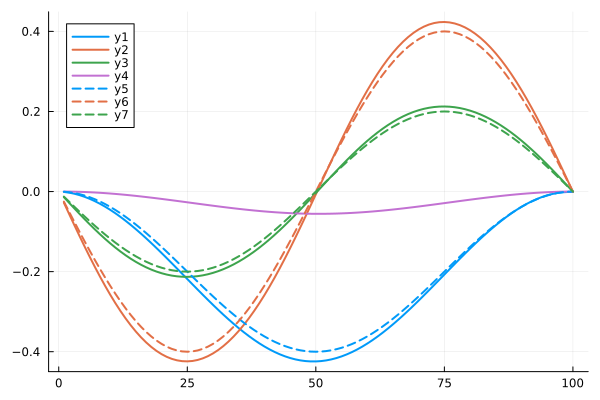

In [73]:
plot(e.Ω*(Kt_data[:,2]+Kt_data[:,4]+Kt_data[:,11]+Kt_data[:,14])/8, width=2.0)
plot!(e.Ω^2*(Kt_data[:,3]+Kt_data[:,5]-Kt_data[:,12]-Kt_data[:,15])/8, width=2.0)
plot!(e.Ω^2*(Kt_data[:,3]+Kt_data[:,5]+Kt_data[:,12]+Kt_data[:,15])/8, width=2.0)
plot!(e.Ω^2*(Kt_data[:,2]+Kt_data[:,4]-Kt_data[:,11]-Kt_data[:,14])/16, width=2.0)
plot!(-e.Ω*(Kt_hand[:,2]+Kt_hand[:,4]+Kt_hand[:,11]+Kt_hand[:,14])/4, style=:dash, color=1, width=2.0)
plot!(-e.Ω^2*(Kt_hand[:,3]+Kt_hand[:,5]-Kt_hand[:,12]-Kt_hand[:,15])/4, style=:dash, color=2, width=2.0)
plot!(-e.Ω^2*(Kt_hand[:,3]+Kt_hand[:,5]+Kt_hand[:,12]+Kt_hand[:,15])/4, style=:dash, color=3, width=2.0)

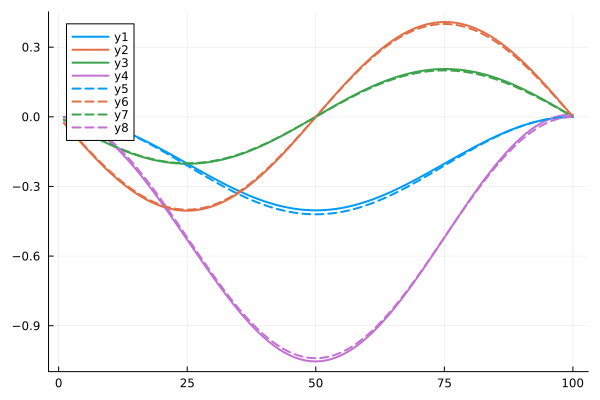

In [163]:
γ = 0.95
plot(γ*e.Ω*(Kt_data[:,2]+Kt_data[:,4]+Kt_data[:,11]+Kt_data[:,14])/8, width=2.0)
plot!(γ*e.Ω^2*(Kt_data[:,3]+Kt_data[:,5]-Kt_data[:,12]-Kt_data[:,15])/8, width=2.0)
plot!(γ*e.Ω^2*(Kt_data[:,3]+Kt_data[:,5]+Kt_data[:,12]+Kt_data[:,15])/8, width=2.0)
plot!(γ*e.Ω^3*(Kt_data[:,2]+Kt_data[:,4]-Kt_data[:,11]-Kt_data[:,14])/8, width=2.0)
plot!(-e.Ω*(Kt_hand3[:,2]+Kt_hand3[:,4]+Kt_hand3[:,11]+Kt_hand3[:,14])/4, style=:dash, color=1, width=2.0)
plot!(-e.Ω^2*(Kt_hand3[:,3]+Kt_hand3[:,5]-Kt_hand3[:,12]-Kt_hand3[:,15])/4, style=:dash, color=2, width=2.0)
plot!(-e.Ω^2*(Kt_hand3[:,3]+Kt_hand3[:,5]+Kt_hand3[:,12]+Kt_hand3[:,15])/4, style=:dash, color=3, width=2.0)
plot!(-e.Ω^3*(Kt_hand3[:,2]+Kt_hand3[:,4]-Kt_hand3[:,11]-Kt_hand3[:,14])/4, style=:dash, color=4, width=2.0)

In [37]:
function check_HF(en::TS_env, Kt::Matrix{Float64})
    #t_size = size(Kt)[1]
    #dt = 2pi/en.t_size
    HF = zeros(Float64, en.t_size, en.HS_size^2)
    dt = (2pi/en.t_size/en.Ω)
    #Ud_p = zeros(Float64, en.t_size, en.HS_size^2)
    for t in 1:en.t_size
        if(t>1)
            tt = t-1
        else
            tt = en.t_size
        end
        KtM = VtoM(Kt[t,:],en)
        KttM = VtoM(Kt[tt,:],en)
        Ud = exp(-1.0im*KtM)
        U = Ud'
        Ud_p = (Ud-exp(-1.0im*KttM))/dt
        HfM = U*(en.H_0 + sin(2pi*t/en.t_size)*en.V_t)*Ud -1.0im*U*Ud_p
        HF[t,:] = MtoV(Hermitian(HfM), en)
    end
    return HF #, Ud_p
end

check_HF (generic function with 1 method)

In [ ]:
read_data = CSV.read("./../../../Data/TwoSpin_Konly_d2_optADAM_W10.0_xi0.2_Jx0.7_Jz1.0_hz0.5_batch4_g0.95_1210/K_TL4000.csv", DataFrame)
Kt_data = Matrix(read_data)

In [77]:
HF_data = check_HF(e, Kt_data)
HF_hand = check_HF(e, -2.0Kt_hand)
HF_hand3 = check_HF(e, -2.0Kt_hand3)

100×16 Matrix{Float64}:
 -1.99998  -0.00675403  0.0600865  -0.00675403  …  -0.0200287   6.38732e-6
 -1.99993  -0.00672287  0.0602272  -0.00672287     -0.0200752   2.22582e-5
 -1.99985  -0.00666508  0.0603821  -0.00666508     -0.0201261   4.74455e-5
 -1.99975  -0.00658085  0.0605505  -0.00658085     -0.0201812   8.16776e-5
 -1.99962  -0.00647048  0.0607316  -0.00647048     -0.0202402   0.000124582
 -1.99946  -0.00633437  0.0609247  -0.00633437  …  -0.0203028   0.00017569
 -1.99928  -0.00617304  0.0611289  -0.00617304     -0.0203687   0.000234443
 -1.99908  -0.00598709  0.0613432  -0.00598709     -0.0204375   0.000300204
 -1.99886  -0.00577727  0.0615667  -0.00577727     -0.0205088   0.000372259
 -1.99862  -0.00554439  0.0617983  -0.00554439     -0.0205824   0.000449834
 -1.99837  -0.00528938  0.0620371  -0.00528938  …  -0.0206577   0.000532101
 -1.99811  -0.00501325  0.062282   -0.00501325     -0.0207345   0.000618194
 -1.99783  -0.00471713  0.0625319  -0.00471713     -0.0208123   0.000

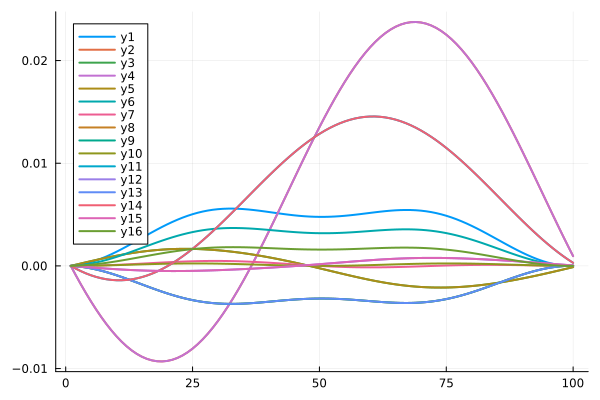

In [78]:
p=plot((HF_hand[:,1].-HF_hand[1,1]), width=2.0)
for i in 2:e.HS_size^2
    p=plot!((HF_hand[:,i].-HF_hand[1,i]), width=2.0)
end
p

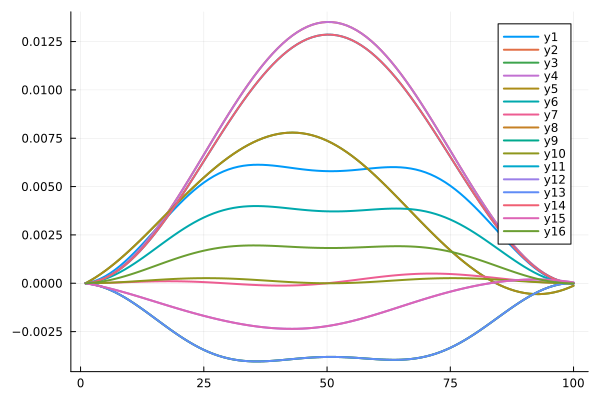

In [79]:
p3=plot((HF_hand3[:,1].-HF_hand3[1,1]), width=2.0)
for i in 2:e.HS_size^2
    p3=plot!((HF_hand3[:,i].-HF_hand3[1,i]), width=2.0)
end
p3

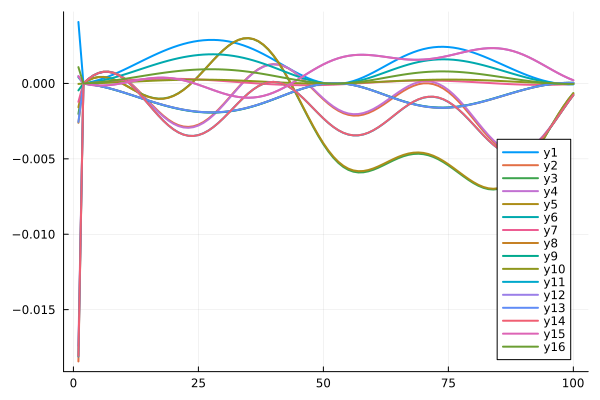

In [58]:
p1=plot((HF_data[:,1].-HF_data[2,1]), width=2.0)
for i in 2:e.HS_size^2
    p1=plot!((HF_data[:,i].-HF_data[2,i]), width=2.0)
end
p1

In [96]:
function FM_Kt2_L(en::TS_env, Nt::Int)
    Kt0 = zeros(Float64, Nt, en.HS_size^2)
    for t in 1:Nt
        ktt = en.V_t * (cos(2pi*t/Nt)-1.0) / en.Ω + 1.0im * (en.V_t*en.H_0 - en.H_0*en.V_t)  * sin(2pi*t/Nt) / en.Ω^2 
        ktt = Hermitian(ktt)
        Kt0[t,:] = MtoV(ktt, en)
    end
    return Kt0
end

function FM_Kt3_L(en::TS_env, Nt::Int)
    Kt0 = zeros(Float64, Nt, en.HS_size^2)
    for t in 1:Nt
        c1 = en.V_t*en.H_0 - en.H_0*en.V_t
        ktt = en.V_t * (cos(2pi*t/Nt)-1.0) / en.Ω + 1.0im * c1  * sin(2pi*t/Nt) / en.Ω^2 + (-en.H_0*c1+c1*en.H_0)* (cos(2pi*t/Nt)-1.0) / (en.Ω^3)
        ktt = Hermitian(ktt)
        Kt0[t,:] = MtoV(ktt, en)
    end
    return Kt0
end

FM_Kt3_L (generic function with 1 method)

In [129]:
function check_HF(en::TS_env, Kt::Matrix{Float64})
    Nt = size(Kt)[1]
    HF = zeros(Float64, Nt, en.HS_size^2)
    
    dt = (2pi/Nt/en.Ω)
    #Ud_p = zeros(Float64, en.t_size, en.HS_size^2)
    for t in 1:Nt
        if(t>1)
            tt = t-1
        else
            tt = Nt
        end
        KtM = VtoM(Kt[t,:],en)
        KttM = VtoM(Kt[tt,:],en)
        Ud = exp(-1.0im*KtM)
        U = Ud'
        Ud_p = (Ud-exp(-1.0im*KttM))/dt
        HfM = U*(en.H_0 + sin(2pi*t/Nt)*en.V_t)*Ud -1.0im*U*Ud_p
        HF[t,:] = MtoV(Hermitian(HfM), en)
    end
    return HF #, Ud_p
end
function check_HF_D(en::TS_env, Kt::Matrix{Float64})
    Nt = size(Kt)[1]
    HF = zeros(Float64, Nt, en.HS_size^2)
    
    dt = (2pi/Nt/en.Ω)
    #Ud_p = zeros(Float64, en.t_size, en.HS_size^2)
    for t in 1:Nt
        if(t>1)
            tt = t-1
            KtM = VtoM(Kt[t,:],en)
            KttM = VtoM(Kt[tt,:],en)
            Ud = exp(-1.0im*KtM)
            U = Ud'
            Ud_p = (Ud-exp(-1.0im*KttM))/dt
            HfM = U*(en.H_0 + sin(2pi*t/Nt)*en.V_t)*Ud -1.0im*U*Ud_p
            HF[t,:] = MtoV(Hermitian(HfM), en)
        else
            KtM = VtoM(Kt[t,:],en)
            KttM = zeros(Float64, en.HS_size, en.HS_size)
            Ud = exp(-1.0im*KtM)
            U = Ud'
            Ud_p = (Ud-exp(-1.0im*KttM))/dt
            HfM = U*(en.H_0 + sin(2pi*t/Nt)*en.V_t)*Ud -1.0im*U*Ud_p
            HF[t,:] = MtoV(Hermitian(HfM), en)
        end
    end
    return HF #, Ud_p
end
function check_HF2(en::TS_env, Kt::Matrix{Float64})
    Nt = size(Kt)[1]
    HF = zeros(Float64, Nt, en.HS_size^2)
    
    dt = (2pi/Nt/en.Ω)
    #Ud_p = zeros(Float64, en.t_size, en.HS_size^2)
    for t in 1:Nt
        tp = t+1
        tm = t-1
        if(t==1)
            tm = Nt
        elseif(t==Nt)
            tp = 1
        end
        KtM = VtoM(Kt[t,:],en)
        KtpM = VtoM(Kt[tp,:],en)
        KtmM = VtoM(Kt[tm,:],en)
        Ud = exp(-1.0im*KtM)
        U = Ud'
        Ud_p = (exp(-1.0im*KtpM)-exp(-1.0im*KtmM))/(2dt)
        HfM = U*(en.H_0 + sin(2pi*t/Nt)*en.V_t)*Ud -1.0im*U*Ud_p
        HF[t,:] = MtoV(Hermitian(HfM), en)
    end
    return HF
end

function check_HF2_D(en::TS_env, Kt::Matrix{Float64})
    Nt = size(Kt)[1]
    HF = zeros(Float64, Nt, en.HS_size^2)
    
    dt = (2pi/Nt/en.Ω)
    #Ud_p = zeros(Float64, en.t_size, en.HS_size^2)
    for t in 1:Nt
        tp = t+1
        tm = t-1
        if(t==1)
            KtM = VtoM(Kt[t,:],en)
            KtpM = VtoM(Kt[tp,:],en)
            KtmM = zeros(Float64, en.HS_size, en.HS_size)
            Ud = exp(-1.0im*KtM)
            U = Ud'
            Ud_p = (exp(-1.0im*KtpM)-exp(-1.0im*KtmM))/(2dt)
            HfM = U*(en.H_0 + sin(2pi*t/Nt)*en.V_t)*Ud -1.0im*U*Ud_p
            HF[t,:] = MtoV(Hermitian(HfM), en)
        elseif(t==Nt)
            KtM = VtoM(Kt[t,:],en)
            KtmM = VtoM(Kt[tm,:],en)
            Ud = exp(-1.0im*KtM)
            U = Ud'
            Ud_p = (Ud-exp(-1.0im*KtmM))/(dt)
            HfM = U*(en.H_0 + sin(2pi*t/Nt)*en.V_t)*Ud -1.0im*U*Ud_p
            HF[t,:] = MtoV(Hermitian(HfM), en)
        else
            KtM = VtoM(Kt[t,:],en)
            KtpM = VtoM(Kt[tp,:],en)
            KtmM = VtoM(Kt[tm,:],en)
            Ud = exp(-1.0im*KtM)
            U = Ud'
            Ud_p = (exp(-1.0im*KtpM)-exp(-1.0im*KtmM))/(2dt)
            HfM = U*(en.H_0 + sin(2pi*t/Nt)*en.V_t)*Ud -1.0im*U*Ud_p
            HF[t,:] = MtoV(Hermitian(HfM), en)
        end
    end
    return HF
end

check_HF2_D (generic function with 1 method)

In [160]:
Kt_hand = zeros(Float64, 100, 16)
#FM_Kt2_L(e,1000)
Kt_hand3 = FM_Kt3_L(e, 100)

println("OK")

OK


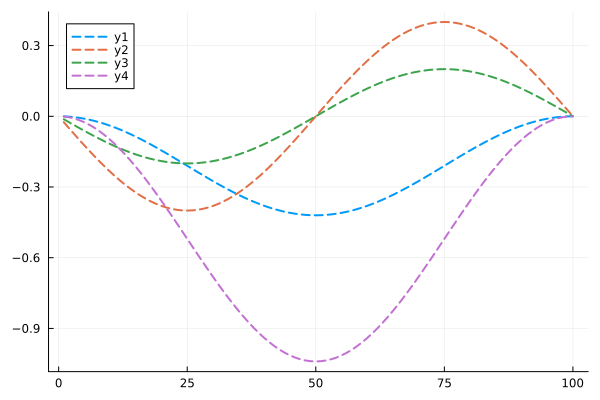

In [110]:
plot(-e.Ω*(Kt_hand3[:,2]+Kt_hand3[:,4]+Kt_hand3[:,11]+Kt_hand3[:,14])/4, style=:dash, color=1, width=2.0)
plot!(-e.Ω^2*(Kt_hand3[:,3]+Kt_hand3[:,5]-Kt_hand3[:,12]-Kt_hand3[:,15])/4, style=:dash, color=2, width=2.0)
plot!(-e.Ω^2*(Kt_hand3[:,3]+Kt_hand3[:,5]+Kt_hand3[:,12]+Kt_hand3[:,15])/4, style=:dash, color=3, width=2.0)
plot!(-e.Ω^3*(Kt_hand3[:,2]+Kt_hand3[:,4]-Kt_hand3[:,11]-Kt_hand3[:,14])/4, style=:dash, color=4, width=2.0)

In [143]:
read_data = CSV.read("./../../../Data/TwoSpin_Konly_d8_optADAM_W10.0_xi0.2_Jx0.7_Jz1.0_hz0.5_batch3_eps0.1_eta1e-2_0210_2/K_TL1000.csv", DataFrame)
Kt_data = Matrix(read_data)

100×16 Matrix{Float64}:
 -1.19389e-5   -9.56066e-5   -0.000819867  …   0.000274813  -1.37206e-5
 -2.33537e-5   -0.000365633  -0.00163504       0.000548889  -2.82094e-5
 -3.42405e-5   -0.000808757  -0.00244209       0.000821042  -4.33373e-5
 -4.4607e-5    -0.00142287   -0.00323768       0.00109008   -5.89584e-5
 -5.44716e-5   -0.0022051    -0.00401853       0.00135483   -7.4914e-5
 -6.38608e-5   -0.00315182   -0.00478149   …   0.00161411   -9.10363e-5
 -7.28071e-5   -0.00425873   -0.00552351       0.00186679   -0.000107153
 -8.13461e-5   -0.00552083   -0.0062417        0.00211175   -0.000123092
 -8.95145e-5   -0.00693251   -0.00693328       0.00234794   -0.000138685
 -9.73472e-5   -0.00848759   -0.00759565       0.00257433   -0.000153772
 -0.000104875  -0.0101793    -0.00822634   …   0.00278997   -0.000168207
 -0.000112123  -0.0120006    -0.00882306       0.00299397   -0.000181856
 -0.000119109  -0.0139436    -0.00938369       0.00318548   -0.000194607
  ⋮                               

In [155]:
function EofHF(en::TS_env, HF::Matrix{Float64})
    Nt = size(HF)[1]
    eHF = zeros(Float64, Nt, en.HS_size)
    for t in 1:Nt
        eHF[t,:], v = eigen(VtoM(HF[t,:], en))
    end
    return eHF
end

EofHF (generic function with 1 method)

In [148]:
HF_hand= check_HF2(e, -2Kt_hand)
HF_hand3 = check_HF2(e, -2Kt_hand3)
HF_data = check_HF_D(e, Kt_data)
HF_data2 = check_HF2_D(e, Kt_data)
println("OK")

OK


In [156]:
eHF_hand3 = EofHF(e, HF_hand3)
eHF_data2 = EofHF(e, HF_data2)

100×4 Matrix{Float64}:
 -2.0582   0.0613823  0.648196  1.34888
 -2.05824  0.06151    0.648179  1.34889
 -2.05824  0.0616246  0.648145  1.3489
 -2.05821  0.0617232  0.648094  1.34891
 -2.05814  0.0618036  0.648029  1.34892
 -2.05805  0.0618643  0.64795   1.34893
 -2.05792  0.061904   0.64786   1.34894
 -2.05776  0.0619225  0.647759  1.34894
 -2.05757  0.0619201  0.64765   1.34894
 -2.05736  0.0618974  0.647535  1.34895
 -2.05713  0.061856   0.647415  1.34895
 -2.05688  0.0617977  0.647292  1.34895
 -2.05662  0.0617247  0.647169  1.34895
  ⋮                             
 -2.05614  0.0599996  0.647126  1.34862
 -2.05635  0.06004    0.647285  1.34865
 -2.05657  0.0600983  0.647439  1.34868
 -2.05679  0.0601743  0.647584  1.34871
 -2.057    0.0602672  0.64772   1.34874
 -2.05721  0.0603756  0.647843  1.34877
 -2.0574   0.0604975  0.647952  1.34879
 -2.05759  0.0606302  0.648044  1.34882
 -2.05775  0.0607709  0.64812   1.34884
 -2.0579   0.060916   0.648177  1.34886
 -2.05802  0.0610621  0.6

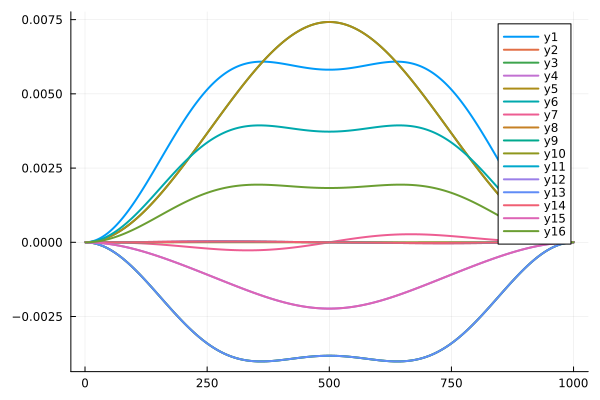

In [145]:
#p3=plot((HF_hand3[:,1]), width=2.0)
p3=plot((HF_hand3[:,1].-HF_hand3[1,1]), width=2.0)
for i in 2:e.HS_size^2
    p3=plot!((HF_hand3[:,i].-HF_hand3[1,i]), width=2.0)
    #p3=plot!((HF_hand3[:,i]), width=2.0)
end
p3

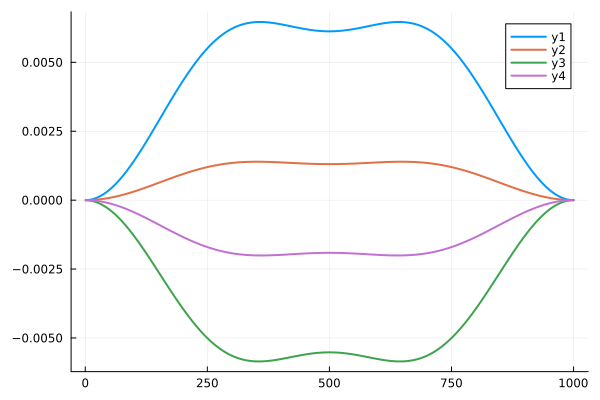

In [157]:
p32=plot((eHF_hand3[:,1].-eHF_hand3[1,1]), width=2.0)
for i in 2:e.HS_size
    p32=plot!((eHF_hand3[:,i].-eHF_hand3[1,i]), width=2.0)
    #p3=plot!((HF_hand3[:,i]), width=2.0)
end
p32

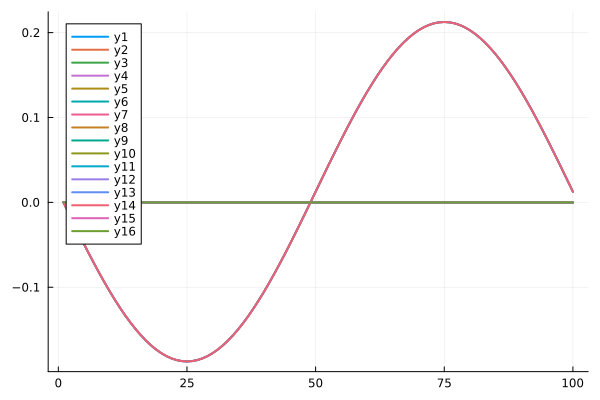

In [149]:
p=plot((HF_hand[:,1].-HF_hand[1,1]), width=2.0)
for i in 2:e.HS_size^2
    p=plot!((HF_hand[:,i].-HF_hand[1,i]), width=2.0)
end
p

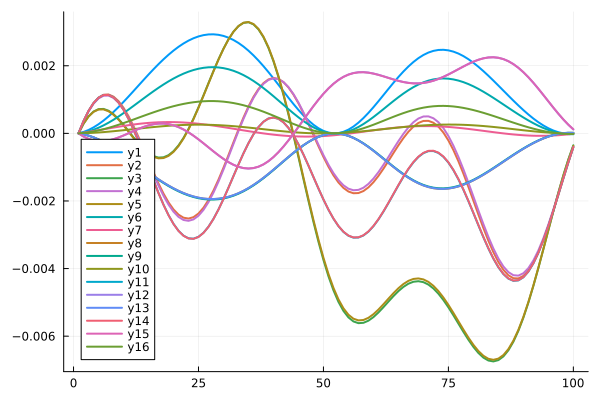

In [131]:
pd=plot((HF_data[:,1].-HF_data[1,1]), width=2.0)
for i in 2:e.HS_size^2
    pd=plot!((HF_data[:,i].-HF_data[1,i]), width=2.0)
end
pd

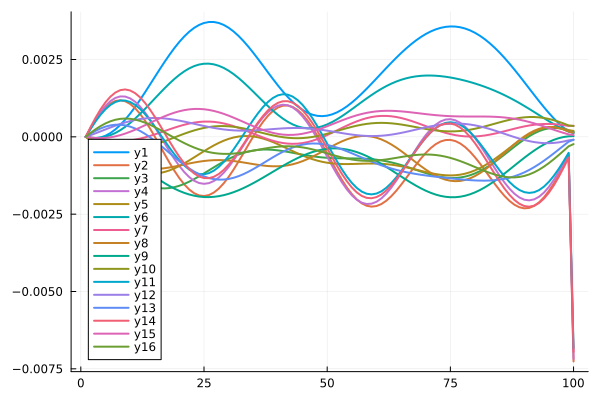

In [146]:
pd2=plot((HF_data2[:,1].-HF_data2[1,1]), width=2.0)
for i in 2:e.HS_size^2
    pd2=plot!((HF_data2[:,i].-HF_data2[1,i]), width=2.0)
end
pd2

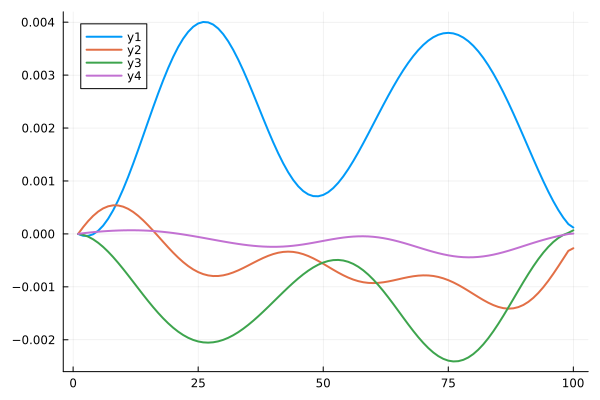

In [158]:
pd22=plot((eHF_data2[:,1].-eHF_data2[1,1]), width=2.0)
for i in 2:e.HS_size
    pd22=plot!((eHF_data2[:,i].-eHF_data2[1,i]), width=2.0)
end
pd22

In [135]:
test = rand(Float64, e.HS_size^2)
test_M = VtoM(test, e)

4×4 Hermitian{ComplexF64, Matrix{ComplexF64}}:
  0.60623+0.0im       0.229722-0.108963im  …  0.408584-0.437666im
 0.229722+0.108963im  0.254884+0.0im          0.281908-0.489891im
 0.466289+0.109455im  0.438812+0.465848im     0.353169-0.299896im
 0.408584+0.437666im  0.281908+0.489891im     0.571508+0.0im

In [141]:
@time s1 = tr(test_M^2)

  0.000016 seconds (4 allocations: 720 bytes)


4.0826527099434715

In [142]:
@time e1, v1 = eigen(test_M)
s2 = e1' * e1

  0.000043 seconds (15 allocations: 4.812 KiB)


4.082652709943458